# Numerical project
_Authors: Gaspard BLAISE, Shun Ye CHEN, Dimitri DE SAINT GUILHEM_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open("../data/first_database.pkl", "rb")as f:
    dataX,dataY=pickle.load(f)

In [2]:
# parameters
n = 100
m = 10
a = 5
sigma = 0.5
nu = 1.0

In [3]:
sel = list(range(n))
ind = np.random.choice(sel,m,replace=False)
x_selected = dataX[ind] # ids_M
ind

array([33, 10,  8, 45, 89,  0, 82, 21, 39, 63])

In [4]:
sel_copy = np.arange(n)
np.random.shuffle(sel_copy)
agents = np.array_split(sel_copy, 5)

In [5]:
from utils.kernel import kernel_matrix
Kmm = kernel_matrix(dataX, ind, ind)
Knm = kernel_matrix(dataX, sel, ind)

In [6]:
import networkx as nx
G = nx.cycle_graph(a)

In [7]:
from utils.graph_tools import laplacian_weight_matrix
W = laplacian_weight_matrix(G, 0.1)

In [8]:
step_count = int(2e4)

## Part I

### Primal methods

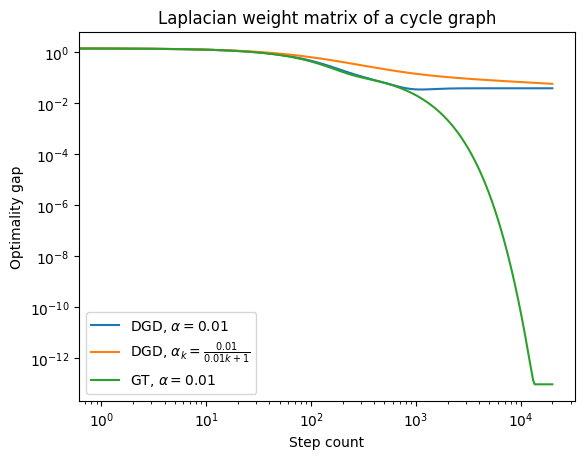

In [18]:
from algorithms.dgd import dgd
from algorithms.gradient_tracking import gt

from utils.kernel import plot_optimality_gap
import matplotlib.pyplot as plt

xi_dgd = dgd(a, m, agents, Kmm, Knm, W, dataY, step_count, step_size=0.01)
xi_gt = gt(a, m, agents, Kmm, Knm, W, dataY, step_count, step_size=0.01)

var_step_size = lambda x: 0.01/(x/100 + 1)
xi_dgd_decreasing = dgd(a, m, agents, Kmm, Knm, W, dataY, step_count, var_step_size, constant_step_size=False)

plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dgd, axis=1), label=r"DGD, $\alpha=0.01$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dgd_decreasing, axis=1), label=r"DGD, $\alpha_k=\frac{0.01}{0.01k+1}$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_gt, axis=1), label=r"GT, $\alpha=0.01$")
plt.legend()
plt.xlabel("Step count")
plt.ylabel("Optimality gap")
plt.title("Laplacian weight matrix of a cycle graph")
plt.show()

Let's try with another weight matrix (we need to adapt the step size also):

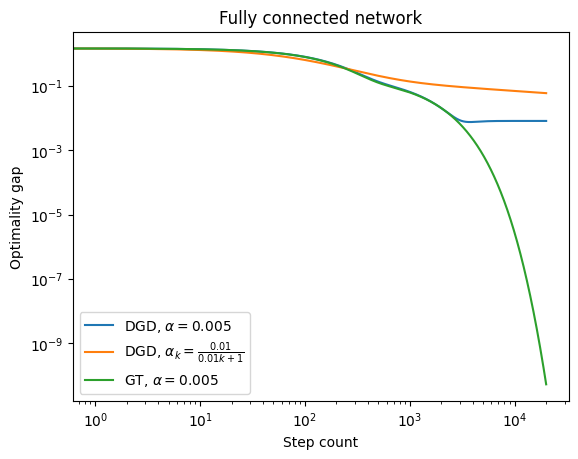

In [10]:
from utils.graph_tools import metropolis_weight_matrix

W2 = np.ones((a,a))/a
xi_dgd = dgd(a, m, agents, Kmm, Knm, W2, dataY, step_count, step_size=0.005)
xi_gt = gt(a, m, agents, Kmm, Knm, W2, dataY, step_count, step_size=0.005)

var_step_size = lambda x: 0.01/(0.01*x + 1)
xi_dgd_decreasing = dgd(a, m, agents, Kmm, Knm, W2, dataY, step_count, var_step_size, constant_step_size=False)

plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dgd, axis=1), label=r"DGD, $\alpha=0.005$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dgd_decreasing, axis=1), label=r"DGD, $\alpha_k=\frac{0.01}{0.01k+1}$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_gt, axis=1), label=r"GT, $\alpha=0.005$")
plt.legend()
plt.xlabel("Step count")
plt.ylabel("Optimality gap")
plt.title("Fully connected network")
plt.show()

### Dual methods

Let's first find the best values for the learning rates / step sizes:

d:\cours\ENSTA\P4\coop\cooperative-optimization\src\utils\kernel.py:56: RuntimeWarning: overflow encountered in square
  opt_gap = [np.sqrt(np.sum((alpha_opt - alphas_over_time[i,:])**2))
d:\cours\ENSTA\P4\coop\cooperative-optimization\.venv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


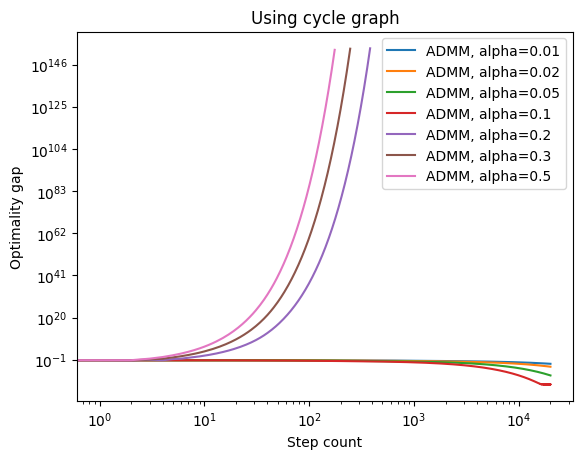

In [14]:
from algorithms.dual_decomp import dual_decomp

step_counts = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5]

for sc in step_counts:
    xi_dd = dual_decomp(a, m, agents, Kmm, Knm, G, dataY, step_count, sc)
    plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dd, axis=1), label=f"ADMM, alpha={sc}")
plt.legend()
plt.xlabel("Step count")
plt.ylabel("Optimality gap")
plt.title("Using cycle graph")
plt.show()

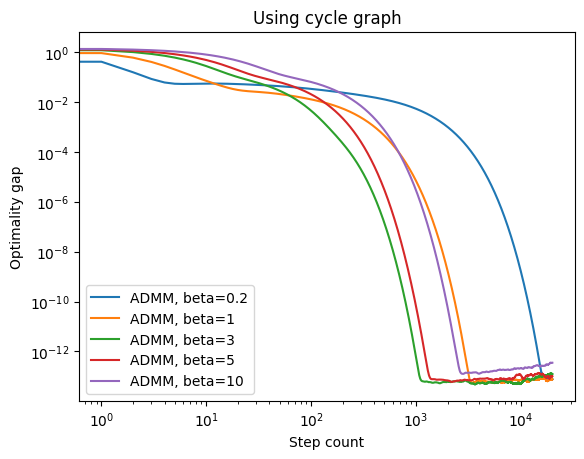

In [ ]:
from algorithms.admm import admm

betas = [0.2, 1, 3, 5, 10]

for b in betas:
    xi_admm = admm(a, m, agents, Kmm, Knm, G, dataY, step_count, beta=b)
    plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_admm, axis=1), label=f"ADMM, beta={b}")
plt.legend()
plt.xlabel("Step count")
plt.ylabel("Optimality gap")
plt.title("Using cycle graph")
plt.show()

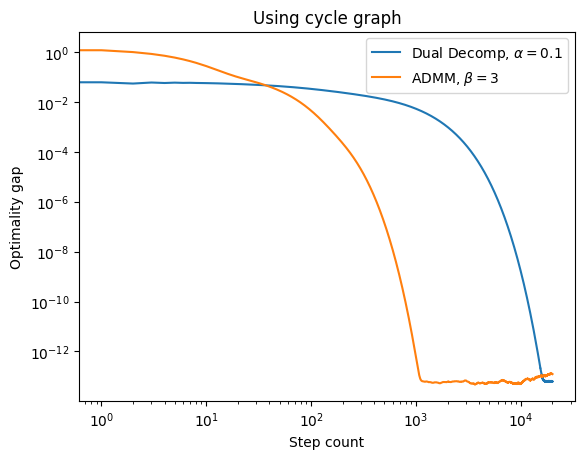

In [15]:
from algorithms.dual_decomp import dual_decomp
from algorithms.admm import admm

xi_dd = dual_decomp(a, m, agents, Kmm, Knm, G, dataY, step_count, step_size=0.1)
xi_admm = admm(a, m, agents, Kmm, Knm, G, dataY, step_count, beta=3)

plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dd, axis=1), label=r"Dual Decomp, $\alpha=0.1$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_admm, axis=1), label=r"ADMM, $\beta=3$")
plt.legend()
plt.xlabel("Step count")
plt.ylabel("Optimality gap")
plt.title("Using cycle graph")
plt.show()

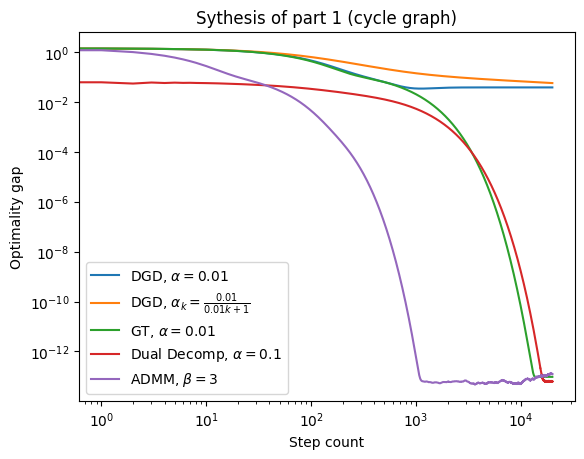

In [20]:
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dgd, axis=1), label=r"DGD, $\alpha=0.01$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dgd_decreasing, axis=1), label=r"DGD, $\alpha_k=\frac{0.01}{0.01k+1}$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_gt, axis=1), label=r"GT, $\alpha=0.01$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_dd, axis=1), label=r"Dual Decomp, $\alpha=0.1$")
plot_optimality_gap(Kmm, Knm, dataY[:n], np.mean(xi_admm, axis=1), label=r"ADMM, $\beta=3$")

plt.legend()
plt.xlabel("Step count")
plt.ylabel("Optimality gap")
plt.title("Sythesis of part 1 (cycle graph)")
plt.show()